# Predicción de Calificaciones de Restaurantes Usando Modelos Supervisados

Este proyecto fue desarrollado durante mi formación académica en ciencia de datos, como parte de una práctica simulada de aprendizaje supervisado. Se utiliza un conjunto de datos real proporcionado por la plataforma Zomato, que contiene información de restaurantes en diversas ubicaciones.

## 🎯 Objetivos
- Aplicar modelos supervisados de machine learning usando Python.
- Predecir la calificación promedio de los restaurantes a partir de variables como ubicación, tipo de cocina, costo promedio y servicios ofrecidos.
- Evaluar el rendimiento de los modelos mediante métricas específicas y visualizar los resultados de manera efectiva.

## 📋 Resumen
Se analiza un conjunto de datos de Zomato que incluye información sobre restaurantes, tipos de cocina, costos, servicios y calificaciones. Se implementan modelos de regresión supervisada, como regresión lineal, para predecir la calificación de los restaurantes según distintas variables independientes. Se hace énfasis en el proceso de limpieza, transformación y selección de variables, seguido por el entrenamiento, evaluación y visualización de los modelos predictivos. Esta práctica busca simular escenarios reales en la industria alimentaria, donde predecir las opiniones de los clientes puede ser clave para la toma de decisiones empresariales.


# Acción 1: Aplicación modelos lineales.



C:\Users\elcar\AppData\Local\Temp\ipykernel_23328\3843421486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


0.20008406893652794
Coeficientes: [4.20696187e-04 6.06357825e-04 5.89923042e-01]
      Average Cost for two  Votes  Has Online delivery  Calificacion_real  \
8003                  1000     42                    0                3.0   
6549                   120      6                    0                3.0   
5472                   400      9                    0                2.7   
3811                  1200    181                    1                3.5   
4662                  2500   1186                    0                3.8   
...                    ...    ...                  ...                ...   
4521                   100     15                    1                3.5   
3103                   800    361                    1                4.0   
3043                   500    427                    1                3.7   
3941                   350     59                    1                3.4   
6736                   400     34                    0                3.

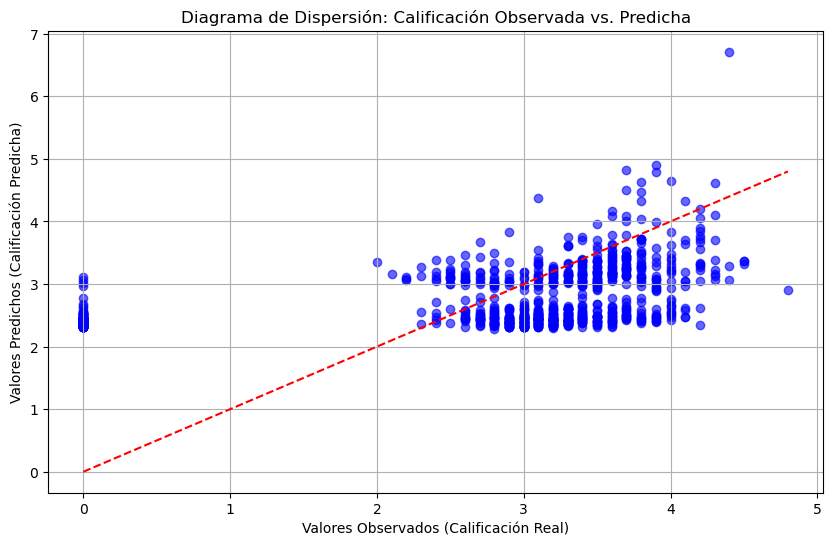

MSE: 1.2937194070447737
RMSE: 1.1374178682633633
R²: 0.16209723326781955


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Cargamos el archivo
df1 = pd.read_csv("Anexo 1 - zomato.csv", sep=',', encoding='latin1')

#miramos que datos faltan o aparecen como NaN
df1.notnull().apply(pd.Series.value_counts)

#Eliminamos datos faltantes de 'Cuisine'
av=(df1.notnull())
av
av.all(axis=1).value_counts()
mask=av['Cuisines']
mask

df1= df1[mask]
#a) filtramos los datos del data frame  para City = 'New Delhi' y Votes > 0
df_filtrado = df1[(df1['City'] == 'New Delhi') & (df1['Votes'] > 0)]

# de los datos filtrados seleccionamos las columnas de interes
df2 = df_filtrado[['Average Cost for two', 'Votes', 'Has Online delivery', 'Aggregate rating']]

# Transformamos la columna 'Has Online delivery' a valores categóricos
df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Definimos las variables X (features) y Y (target)
X = df2[['Average Cost for two', 'Votes', 'Has Online delivery']]
Y = df2['Aggregate rating']

# b) Dividimos los datos en conjuntos de entrenamiento y prueba 80-20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#miramos cuantos son los datos de ensayo o test
print(len(X_test)/len(Y))

#C) aplicamos el modelo de regresion

# entrenamos el modelo de regresión lineal con el 80% de los datos
model = LinearRegression()
model.fit(X_train, y_train)

# ahora miramos Coeficientes del modelo o los mismos betas de la ecuacion 
coeficientes = model.coef_
print("Coeficientes:", coeficientes)

#D)Realizamos las predicciones sobre la base de prueba. Calcule el R², MSE y RMSE.
# Vamos a realizar predicciones sobre el conjunto de prueba
predicciones = model.predict(X_test)

# vamos a crear un DataFrame para comparar predicciones y valores reales
comparaciones = pd.DataFrame(X_test, columns=['Average Cost for two', 'Votes', 'Has Online delivery'])
comparaciones = comparaciones.assign(Calificacion_real=y_test.values)
comparaciones = comparaciones.assign(Calificacion_predicha=predicciones.flatten())

# Mostramos las comparaciones
print(comparaciones)

#graficamos las comparaciones
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(comparaciones['Calificacion_real'], comparaciones['Calificacion_predicha'], color='blue', alpha=0.6)
plt.plot(
    [comparaciones['Calificacion_real'].min(), comparaciones['Calificacion_real'].max()],
    [comparaciones['Calificacion_real'].min(), comparaciones['Calificacion_real'].max()],
    color='red',
    linestyle='--'
)
plt.xlabel('Valores Observados (Calificación Real)')
plt.ylabel('Valores Predichos (Calificación Predicha)')
plt.title('Diagrama de Dispersión: Calificación Observada vs. Predicha')
plt.grid(True)
plt.show()

#D)Realizar las predicciones sobre la base de prueba. Calcule el R², MSE y RMSE.
# ahora hallamos el error cuadratico medio y su raiz cuadrada
import numpy as np
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


# Acción 2: Aplicación modelo logístico.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from statsmodels.tools import add_constant
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargamos los datos
df = pd.read_csv("Anexo 1 - zomato.csv", sep=',', encoding='latin1')

# Filtramos los datos de la ciudad y votos > 0
df_filtrado = df[(df['City'] == 'New Delhi') & (df['Votes'] > 0)]

# Creamos la columna 'nivel_calificacion'
df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')

# Seleccionar columnas features y targget
df2 = df_filtrado[['Average Cost for two', 'Votes', 'Has Online delivery', 'nivel_calificacion']]
#convertimos los valores de la columna 'Has Online delivery' en binaria
df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Variables X= features e y= targget
X = df2[['Average Cost for two', 'Votes', 'Has Online delivery']]
y = df2['nivel_calificacion']



C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\2536243166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')
C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\2536243166.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


In [5]:
# Balanceo de clases (submuestreo)
np.random.seed(42)

# Determinamos el número de muestras de la clase minoritaria
muestras_minimas = y.value_counts().min()

# Separamos las clases
clase_bajo = X[y == 'bajo']
clase_alto = X[y == 'alto']

# Muestreamos sin reemplazo para tener el mismo número de observaciones en ambas clases
clase_bajo_balanceada = clase_bajo.sample(muestras_minimas, random_state=42)
clase_alto_balanceada = clase_alto.sample(muestras_minimas, random_state=42)

# Concatenamos las clases balanceadas
X_balanceado = pd.concat([clase_bajo_balanceada, clase_alto_balanceada])
y_balanceado = pd.concat([y.loc[clase_bajo_balanceada.index], y.loc[clase_alto_balanceada.index]])

# Verificamos el tamaño y la distribución de las clases
print(X_balanceado.shape)  # Tamaño de X_balanceado
print(y_balanceado.shape)  # Tamaño de y_balanceado
print("Distribución de clases en y_balanceado:\n", y_balanceado.value_counts())


(1376, 3)
(1376,)
Distribución de clases en y_balanceado:
 nivel_calificacion
bajo    688
alto    688
Name: count, dtype: int64


In [6]:
# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluamos del modelo
y_pred = modelo.predict(X_test)
precision = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

print("Precisión:", precision)
print("Matriz de confusión:")
print(matriz_confusion)

Precisión: 0.782608695652174
Matriz de confusión:
[[ 96  42]
 [ 18 120]]


In [25]:
#ahora corremos el mismo codigo pero haciendo un sobremuestreo

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

# Cargamos los datos
df1 = pd.read_csv("Anexo 1 - zomato.csv", sep=',', encoding='latin1')

# Filtramos y limpiamos los datos
df1 = df1[df1['Cuisines'].notnull()]  # Filtrar filas donde 'Cuisines' no es NaN

# Filtramos los datos para City = 'New Delhi' y Votes > 0
df_filtrado = df1[(df1['City'] == 'New Delhi') & (df1['Votes'] > 0)]

# Creamos la columna 'nivel_calificacion'
df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')

# Seleccionamos columnas relevantes
df2 = df_filtrado[['Average Cost for two', 'Votes', 'Has Online delivery', 'nivel_calificacion']]
df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Eliminamos valores faltantes
df2 = df2.dropna()

# seleccionamos Variables X=features e y=targget
X = df2[['Average Cost for two', 'Votes', 'Has Online delivery']]
y = df2['nivel_calificacion']

# Verificamos el conteo de las clases
counts = y.value_counts()

# Determinamos las clases
clase_minoria = counts.idxmin()  # Clase minoritaria
clase_mayoria = counts.idxmax()  # Clase mayoritaria

# Separamos las clases
X_minoria = X[y == clase_minoria]
y_minoria = y[y == clase_minoria]

X_mayoria = X[y == clase_mayoria]
y_mayoria = y[y == clase_mayoria]

# Realizamos sobremuestreo de la clase minoritaria
X_minoria_resample, y_minoria_resample = resample(X_minoria, y_minoria, 
                                                  replace=True,  # Con reemplazo
                                                  n_samples=len(X_mayoria),  # Igualar el número de muestras
                                                  random_state=42)

# Concatenamos las clases balanceadas
X_balanceado = pd.concat([X_mayoria, X_minoria_resample])
y_balanceado = pd.concat([y_mayoria, y_minoria_resample])

# Verificamos la distribución de las clases
print("Distribución de clases en y_balanceado:\n", y_balanceado.value_counts())

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, test_size=0.2, random_state=42)

# Entrenamos el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Evaluamos del modelo
y_pred = modelo.predict(X_test)
precision = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

print("Precisión:", precision)
print("Matriz de confusión:")
print(matriz_confusion)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Distribución de clases en y_balanceado:
 nivel_calificacion
bajo    4070
alto    4070
Name: count, dtype: int64
Precisión: 0.75
Matriz de confusión:
[[541 269]
 [138 680]]
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.80      0.67      0.73       810
        bajo       0.72      0.83      0.77       818

    accuracy                           0.75      1628
   macro avg       0.76      0.75      0.75      1628
weighted avg       0.76      0.75      0.75      1628



C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\430021918.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')
C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\430021918.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


# Acción 3: Aplicación K-NN.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargamos los datos
df1 = pd.read_csv("Anexo 1 - zomato.csv", sep=',', encoding='latin1')

# Filtramos y limpiamos los datos
df1 = df1[df1['Cuisines'].notnull()]  # Filtrar filas donde 'Cuisines' no es NaN

# Filtramos los datos para City = 'New Delhi' y Votes > 0
df_filtrado = df1[(df1['City'] == 'New Delhi') & (df1['Votes'] > 0)]

# Creamos la columna 'nivel_calificacion' y suponiendo que hacemos la calsificacion bajo y alto del anterior ejercicio
df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')

# Seleccionamos columnas relevantes
df2 = df_filtrado[['Average Cost for two', 'Votes', 'Has Online delivery', 'nivel_calificacion']]
df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Eliminamos valores faltantes
df2 = df2.dropna()

# Variables X e y
X = df2[['Average Cost for two', 'Votes', 'Has Online delivery']]
y = df2['nivel_calificacion']

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo K-NN con n_neighbors=5 (podriamos tomar mas valores cercanos)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Realizamos las predicciones sobre el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calculamos la precisión (accuracy)
precision = accuracy_score(y_test, y_pred)

# Mostramos los resultados
print("Precisión del modelo K-NN:", precision)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo K-NN: 0.8813025210084033
Matriz de confusión:
[[ 64  73]
 [ 40 775]]
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.62      0.47      0.53       137
        bajo       0.91      0.95      0.93       815

    accuracy                           0.88       952
   macro avg       0.76      0.71      0.73       952
weighted avg       0.87      0.88      0.87       952



C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\126678557.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')
C:\Users\elcar\AppData\Local\Temp\ipykernel_1816\126678557.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)


# Acción 4: Aplicación Árboles de decisión (CART).

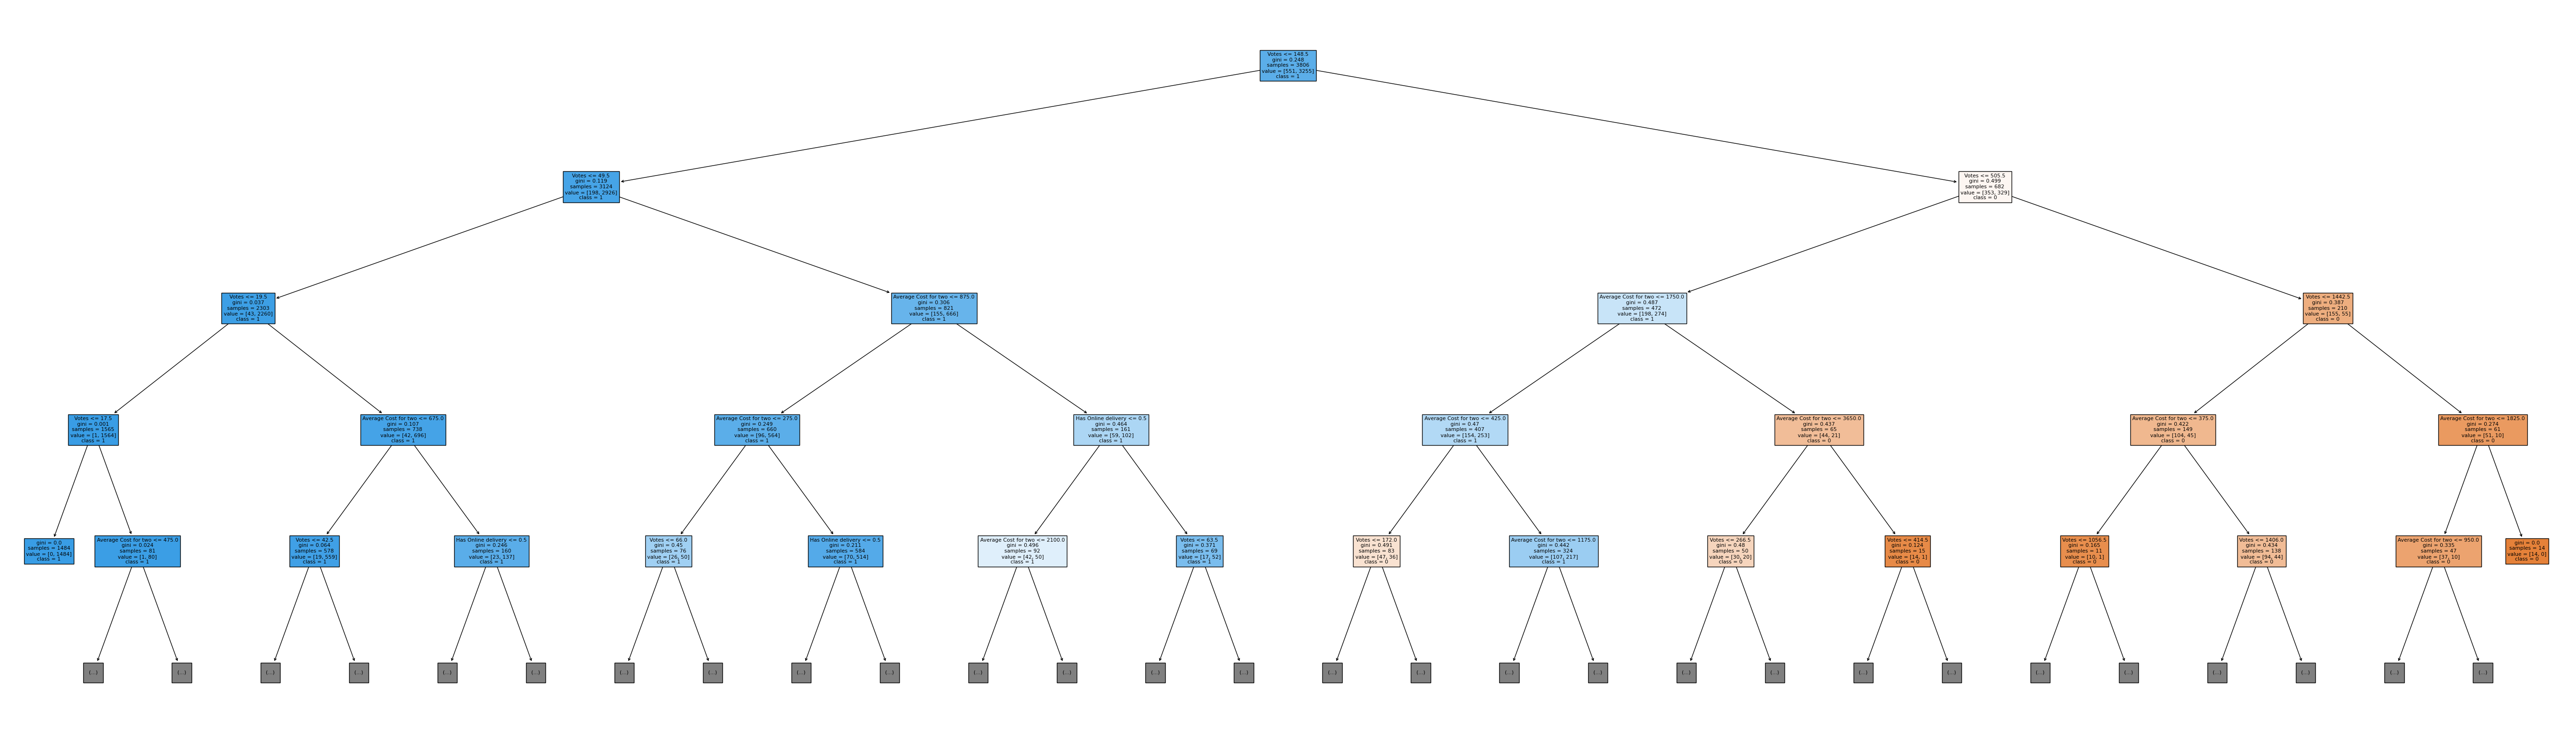

Precisión: 0.8445378151260504

Matriz de confusión:
[[ 64  73]
 [ 75 740]]

Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.46      0.47      0.46       137
        bajo       0.91      0.91      0.91       815

    accuracy                           0.84       952
   macro avg       0.69      0.69      0.69       952
weighted avg       0.85      0.84      0.85       952



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargamos los datos
df1 = pd.read_csv("Anexo 1 - zomato.csv", sep=',', encoding='latin1')

# Filtramos y limpiamos los datos
df1 = df1[df1['Cuisines'].notnull()]  # Filtrar filas donde 'Cuisines' no es NaN

# Filtramos los datos para City = 'New Delhi' y Votes > 0
df_filtrado = df1[(df1['City'] == 'New Delhi') & (df1['Votes'] > 0)].copy()

# Creamos la columna 'nivel_calificacion'
df_filtrado['nivel_calificacion'] = df_filtrado['Aggregate rating'].apply(lambda x: 'alto' if x > 3.7 else 'bajo')

# Seleccionamos las columnas relevantes 
df2 = df_filtrado[['Average Cost for two', 'Votes', 'Has Online delivery', 'nivel_calificacion']].copy()
df2['Has Online delivery'] = df2['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

# Eliminamos valores faltantes
df2 = df2.dropna()

# Variables X e y features en x y targget en 'y'
X = df2[['Average Cost for two', 'Votes', 'Has Online delivery']]
y = df2['nivel_calificacion']

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Graficamos el árbol de decisión
plt.figure(figsize=(70, 20))  # Ajustar tamaño de la figura
plot_tree(cart_model, 
          feature_names=X_train.columns,  # Usar las columnas de las características
          class_names= ['0', '1'],  # Nombres de las clases
          filled=True, 
          max_depth=4 
         )
plt.show()  # Muestra el gráfico

# Realizamos predicciones y calculamos precisión
y_pred = cart_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imprimimos los  resultados
print("Precisión:", accuracy)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Acción 5: Conclusiones.

- Redacte unas conclusiones generales (en una celda markdown) de los resultados de las acciones 1 a 4.

__*Conclusiones Accion 1*__
>En este ejercicio se utilizó un modelo de regresión lineal que resultó en un coeficiente de determinación 𝑅^2= 0.16. Esto significa que el modelo únicamente explica el 16% de la variabilidad en la variable objetivo a partir de las variables predictoras utilizadas. Este bajo valor de R^2,
indica que el modelo no captura de manera adecuada la relación entre los datos, lo que sugiere una capacidad predictiva limitada. En consecuencia, el modelo puede no ser el más adecuado para realizar predicciones precisas con el conjunto de datos utilizado. Esto podría deberse a una relación débil entre las variables predictoras y la variable objetivo, la posible omisión de variables relevantes, o a la limitación inherente de la regresión lineal para modelar relaciones no lineales en los datos..

__*Conclusiones Accion 2*__

>Para este modelo (regresion lineal) se utilizó una técnica de submuestreo para balancear los datos, ya que las clases en las variables de entrada (X) y la variable objetivo (y) estaban desbalanceadas, lo que podría afectar negativamente el rendimiento del modelo. La técnica de submuestreo consiste en reducir el número de muestras de la clase mayoritaria para igualar la cantidad de muestras entre ambas clases, lo que ayuda a evitar que el modelo se sesgue hacia la clase más representada.

>Una vez realizado el balanceo de los datos, el modelo entrenado alcanzó una precisión del 78%, lo cual se considera un desempeño aceptable en este caso, considerando la naturaleza de los datos y la tarea. Esta precisión está dentro de los rangos esperados para un modelo de regresión logística aplicado a datos balanceados.

>Además, se utilizó np.random.seed(42) para garantizar la reproducibilidad de los resultados. Esto asegura que los procesos de muestreo y entrenamiento del modelo puedan ser replicados en futuras ejecuciones, manteniendo la consistencia en los resultados.

>prodriamos utilizar el mismo codigo para hacer un sobremuestreo.

__*Conclusiones Accion 3*__
>En este ejercicio se implementó un modelo de clasificación K-Nearest Neighbors (K-NN), logrando una precisión global del 88.13%. Este resultado refleja una capacidad significativa del modelo para clasificar correctamente las instancias del conjunto de prueba.

>Al analizar la matriz de confusión, observamos lo siguiente:

>La clase "alto" (calificaciones altas) presenta 64 clasificaciones correctas y 73 incorrectas, lo que evidencia dificultades para identificar esta clase.
La clase "bajo" (calificaciones bajas) tiene un desempeño sobresaliente con 775 clasificaciones correctas frente a solo 40 incorrectas.
El reporte de clasificación refuerza estas observaciones:


__*Conclusiones Accion 4*__
>El modelo de árbol de decisión alcanzó una precisión global del 84.45%, lo cual indica un desempeño satisfactorio en términos generales. Sin embargo, al analizar las métricas por clase, se observan ciertos desequilibrios en la capacidad del modelo para clasificar correctamente las clases "alto" y "bajo".
>se grafico el arbol de decision, aunque fue un poco dificil realizarlo Usando la función graphviz() y se utilizo la metodologia propuesta por el tutor  para visualizar el diagrama de árbol, y aunque se grafico las decisiones no se ven claramente esto esta relacionado con los parametros de graficacion, se debe buscar un equilibrio entre el tamaño y la cantidad de 'ramas' para que el arbol de decision sea utilizado como una herramienta podera en la toma de decisiones.
>El árbol de decisión puede ser una herramienta poderosa para la toma de decisiones, pero su utilidad depende en gran medida de una visualización clara y accesible. Ajustar tanto los parámetros del modelo como los de graficación permitirá obtener un diagrama más comprensible, mejorando su aplicación práctica y su capacidad para comunicar información.

__*Generales*__
>Los resultados obtenidos muestran que no existe un modelo único que sea óptimo para todos los casos. La elección del modelo debe basarse en la naturaleza del problema, la distribución de los datos y los objetivos específicos.

>Visualización e Interpretabilidad: Modelos como los árboles de decisión pueden ser herramientas poderosas, pero su utilidad depende de representaciones claras y comprensibles. Es esencial optimizar la visualización para mejorar su aplicabilidad en la toma de decisiones.

# Referencias

>Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site

>Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site

>Moran Pizarro, D. S. ., Dominguez Bonilla, S. J. ., Castaño Gutierrez, C. ., & Martinez Bez, C. E. . (2023). De Hilbert a los algoritmos cuánticos: el rol del álgebra en el desarrollo de la computación. Publicaciones E Investigación, 17(4). https://doi.org/10.22490/25394088.7503

>Gaitan, R. (2022). Metrics. [Objeto_virtual_de_Informacion_OVI]. Repositorio Institucional UNAD.  https://repository.unad.edu.co/handle/10596/50418

>Barreto, S.P. (2024). Aprendizaje supervisado. [Objeto_virtual_de_Informacion_OVI]. Repositorio Institucional UNAD. https://repository.unad.edu.co/handle/10596/62836